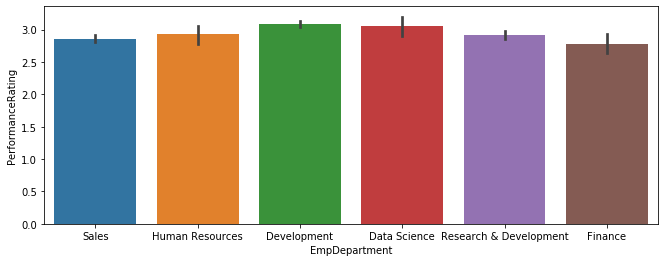

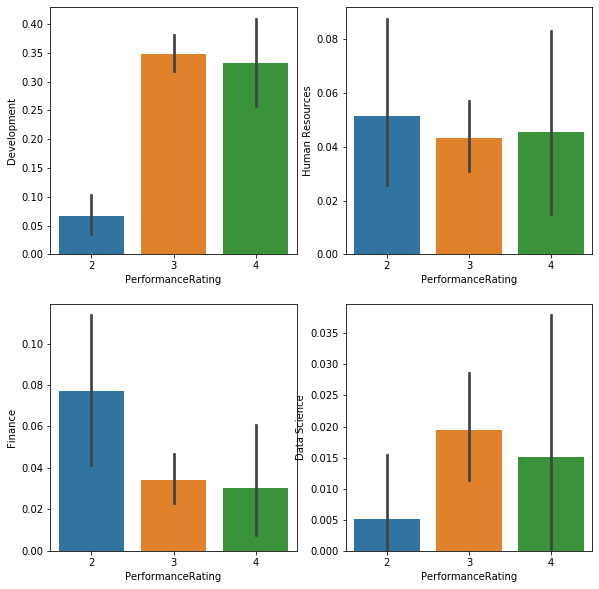

'sc = StandardScaler()    # has 0 mean and unit variance --> x-mean/xstd\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test)\n\nX_train.shape\n\nX_test.shape\n\nclassifier = DecisionTreeClassifier()\nclassifier.fit(X_train, y_train)\nY_pred = classifier.predict(X_test)\nprint(confusion_matrix(y_test, Y_pred))\nprint(accuracy_score(y_test,Y_pred))\nprint(classification_report(y_test, Y_pred))'

In [2]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# Importing the csv file
data = pd.read_csv('Employee_performance.csv')

#Exploratory Data Analysis
data.shape
data.columns
data.head()

# Looking for missing data
#data.info()



# A new pandas Dataframe is created to analyze department wise performance as asked.
dept = data.iloc[:,[5,27]].copy()
dept_per = dept.copy()

# Finding out the mean performance of all the departments and plotting its bar graph using seaborn.
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].mean()

plt.figure(figsize=(11,4))
sns.barplot(dept_per['EmpDepartment'],dept_per['PerformanceRating'])

# Analyze each department separately
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].value_counts()

# Creating a new dataframe to analyze each department separately
department = pd.get_dummies(dept_per['EmpDepartment'])
performance = pd.DataFrame(dept_per['PerformanceRating'])
dept_rating = pd.concat([department,performance],axis=1)



# Plotting a separate bar graph for performance of each department using seaborn
plt.figure(figsize=(15,10))
#plt.subplot(2,3,1)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Sales'])
plt.subplot(2,3,2)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Development'])
plt.subplot(2,3,3)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Human Resources'])
plt.subplot(2,3,5)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Finance'])
plt.subplot(2,3,6)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Data Science'])
plt.show()

#Data processing

# Encoding all the ordinal columns and creating a dummy variable for them to see if there are any effects on Performance Rating
enc = LabelEncoder()
for i in (2,3,4,5,6,7,16,26):
    data.iloc[:,i] = enc.fit_transform(data.iloc[:,i])
data.head()


#future selection
# Finding out the correlation coeffecient to find out which predictors are significant.
data.corr()

# Dropping the first columns as it is of no use for analysis.
data.drop(['EmpNumber'],inplace=True,axis=1)
data.head()
# Here we have selected only the important columns
y = data.PerformanceRating
#X = data.iloc[:,0:-1]  All predictors were selected it resulted in dropping of accuracy.
X = data.iloc[:,[4,5,9,16,20,21,22,23,24]] # Taking only variables with correlation coeffecient greater than 0.1
X.head()

# Splitting into train and test for calculating the accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

# Standardization technique is used
sc = StandardScaler()    # has 0 mean and unit variance --> x-mean/xstd
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train.shape

X_test.shape

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
Y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, Y_pred))
print(accuracy_score(y_test,Y_pred))
print(classification_report(y_test, Y_pred))